In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde

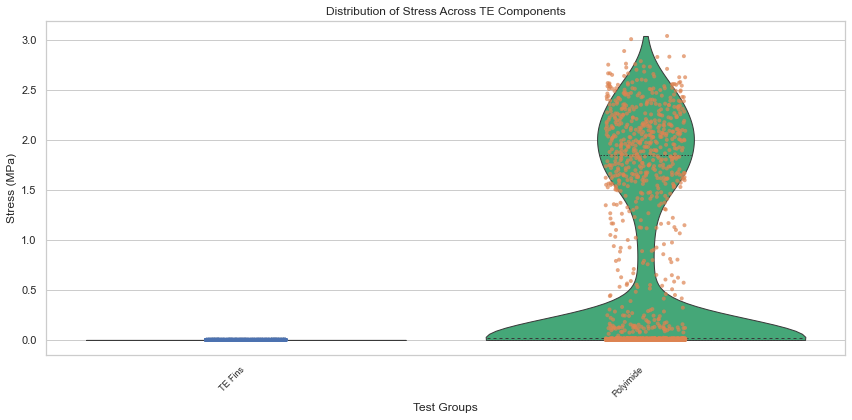

In [13]:
#Combined Data in One Graph

file_path = 'Combined mUTM Data.xlsx'
Sheet_const = {
    'TE Fins': {'A0': 40500, 'L0': 150},
    'Polyimide': {'A0': 36, 'L0': 12},
    '12.5% PVA': {'A0': 15.6913, 'L0': 14.01},
    '10% PVA': {'A0': 15.6913, 'L0': 14.01}
}

all_sheets = pd.read_excel(file_path, sheet_name=None)

all_data_combined = pd.DataFrame()
missing_sheets = []

for sheet_name, df in all_sheets.items():
    if sheet_name not in Sheet_const:
        continue
    df = df.copy()
    if 'Force_N' not in df.columns:
        missing_sheets.append(sheet_name)
        continue

    df['Force_N'] = pd.to_numeric(df['Force_N'], errors='coerce')
    const = Sheet_const[sheet_name]
    df['Test_Source'] = sheet_name
    df['Stress_MPa'] = df['Force_N'] / const['A0']
    all_data_combined = pd.concat([all_data_combined, df], ignore_index=True)

if all_data_combined.empty:
    raise SystemExit("ERROR: Combined dataset is empty after processing. Check sheet names and 'Force_N' column.")

all_data_combined = all_data_combined.replace([np.inf, -np.inf], np.nan).dropna(subset=['Stress_MPa'])

group_counts = all_data_combined.groupby('Test_Source')['Stress_MPa'].count().sort_values(ascending=False)

small_groups = group_counts[group_counts < 3]
if not small_groups.empty:
    exit()

plt.figure(figsize=(12,6))
sns.set(style="whitegrid")

try:
    order = [k for k in Sheet_const.keys() if k in all_data_combined['Test_Source'].unique()]
    sns.violinplot(
        x="Test_Source", y="Stress_MPa", data=all_data_combined,
        order=order,
        palette="viridis",
        inner="quartile",
        cut=0,
        bw=0.2,           
        scale='width',
        linewidth=1
    )

    sns.stripplot(x="Test_Source", y="Stress_MPa", data=all_data_combined, order=order, jitter=True, size=4, edgecolor="k", alpha=0.7)
    plt.title('Distribution of Stress Across TE Components')
    plt.xlabel('Test Groups')
    plt.ylabel('Stress (MPa)')
    plt.xticks(rotation=45, ha='right', fontsize=9)
    plt.tight_layout()
    plt.show()

except Exception as e:
    unique_groups = all_data_combined['Test_Source'].unique()
    n_groups = len(unique_groups)
    fig, ax = plt.subplots(figsize=(12,6))
    positions = np.arange(n_groups)
    max_width = 0.6

    for i, grp in enumerate(unique_groups):
        data = all_data_combined.loc[all_data_combined['Test_Source'] == grp, 'Stress_MPa'].values
        if len(data) == 0:
            continue
        if len(data) == 1:
            ax.scatter(i, data[0], s=40, zorder=3)
            continue
        kde = gaussian_kde(data)
        grid_min, grid_max = data.min(), data.max()
        grid = np.linspace(grid_min - 0.1*(grid_max-grid_min+1e-9), grid_max + 0.1*(grid_max-grid_min+1e-9), 200)
        density = kde(grid)
        density = density / density.max() * max_width
        ax.fill_betweenx(grid, i - density, i + density, alpha=0.6)
        med = np.median(data)
        ax.plot([i - max_width, i + max_width], [med, med], color='k', linewidth=1)

    ax.set_xticks(positions)
    ax.set_xticklabels(unique_groups, rotation=45, ha='right', fontsize=9)
    ax.set_xlim(-1, n_groups)
    ax.set_ylabel('Stress (MPa)')
    ax.set_title('Manual violin-style KDE plot (fallback)')
    plt.tight_layout()
    plt.show()

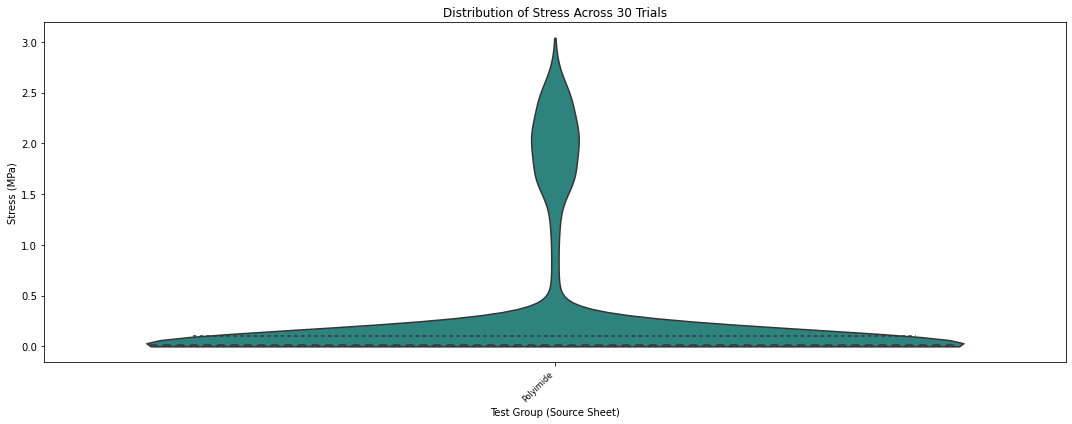

In [3]:
# Individual Graph - Polyimide

file_path = 'Combined mUTM Data.xlsx'

A0 = 36
L0 = 12

MIN_STRESS_THRESHOLD = 0.05 

all_sheets = pd.read_excel(file_path, sheet_name = None)
   
all_data_combined = pd.DataFrame()
for sheet_name, df in all_sheets.items():
    df = df.copy()
    df['Test_Source'] = 'Polyimide'
    df['Stress_MPa'] = df['Force_N'] / A0
    all_data_combined = pd.concat([all_data_combined, df], ignore_index=True)


plt.figure(figsize=(15,6))

sns.violinplot(x="Test_Source", y="Stress_MPa", data=all_data_combined, palette="viridis", inner="quartile", cut=0)
plt.title('Distribution of Stress Across 30 Trials')
plt.xlabel('Test Group (Source Sheet)')
plt.ylabel('Stress (MPa)')
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.tight_layout()
plt.show()

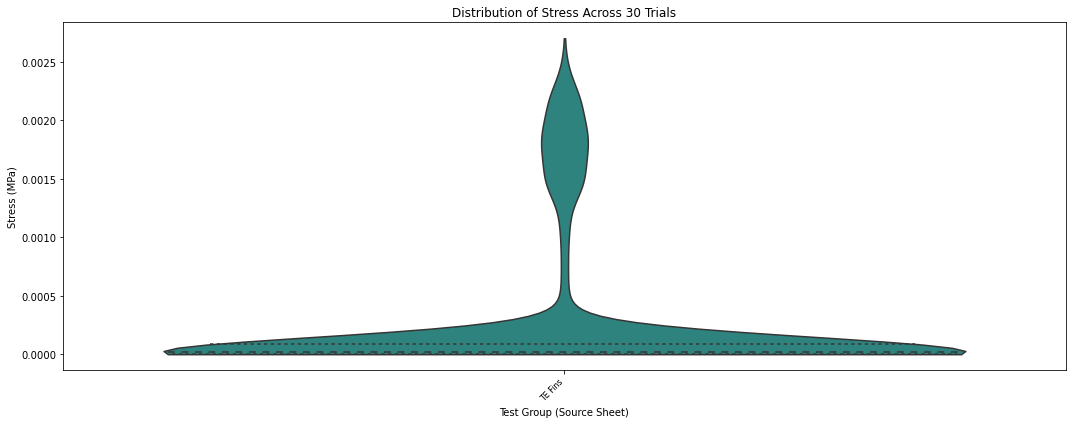

In [4]:
# Individual Graph - TE Fins

file_path = 'Combined mUTM Data.xlsx'

A0 = 40500
L0 = 150

all_sheets = pd.read_excel(file_path, sheet_name = None)

   
all_data_combined = pd.DataFrame()
for sheet_name, df in all_sheets.items():
    df = df.copy()
    df['Test_Source'] = 'TE Fins'
    df['Stress_MPa'] = df['Force_N']/A0
    all_data_combined = pd.concat([all_data_combined, df], ignore_index=True)



plt.figure(figsize=(15,6))

sns.violinplot(x="Test_Source", y="Stress_MPa", data=all_data_combined, palette="viridis", inner="quartile", cut=0)
plt.title('Distribution of Stress Across 30 Trials')
plt.xlabel('Test Group (Source Sheet)')
plt.ylabel('Stress (MPa)')
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.tight_layout()
plt.show()